In [1]:
import scipy as sp
import numpy as np
import sympy as sm
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import os
import json 
plt.style.use('bmh')
pi = sm.pi
currentDir = %pwd
dataPath = os.path.join(currentDir, "harmonicData.json")
#Ex 1.8.1-1.8.5 apo Massen
#Henceforth,I will consider hbar = omega = m = 1 

In [2]:
x = sm.Symbol('x',real=True)
n = sm.Symbol('n', integer=True,positive=True)
V,E = x**2/2, (n+1/2) 
xValues = np.linspace(-5,5,1000)
yValues = np.array([V.subs({x:element}) for element in xValues])

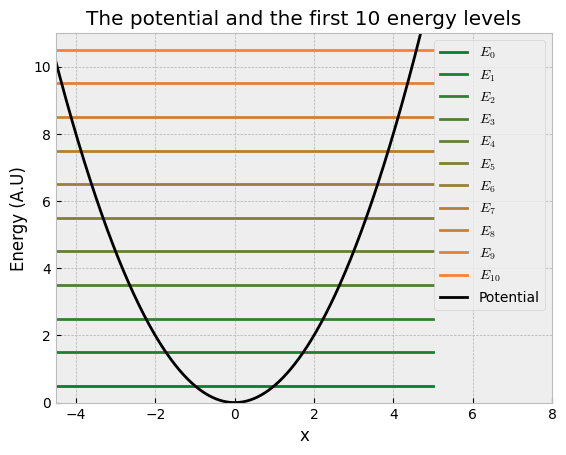

In [17]:
for index in range(11):
    color = (index/10,0.5,0.2)
    energyValues = np.array([E.subs({n:index}) for element in xValues])
    plt.plot(xValues,energyValues,label=fr'$E_{{{index}}}$',color=color)
plt.plot(xValues,yValues,label='Potential',color='black')
plt.xlim(-4.5,8)
plt.ylim(0,11)
plt.legend()
plt.xlabel(r'x')
plt.ylabel('Energy (A.U)')
plt.title('The potential and the first 10 energy levels')
plt.show()

In [4]:
#Now to the wavefunctions
psi = sm.hermite(n,x)*sm.exp(-x**2/2)*pi**(-1/4)*(1/sm.sqrt(sm.factorial(n)*2**n))
psi

exp(-x**2/2)*hermite(n, x)/(2**(n/2)*pi**0.25*sqrt(factorial(n)))

In [5]:
WFValuesArray = []
for index in range(11):
    current = []
    for element in xValues:
        current.append(psi.subs({n:index,x:element}))
    WFValuesArray.append(np.array(current)) #We get the y values of every wavefunction so that we may plot them against x

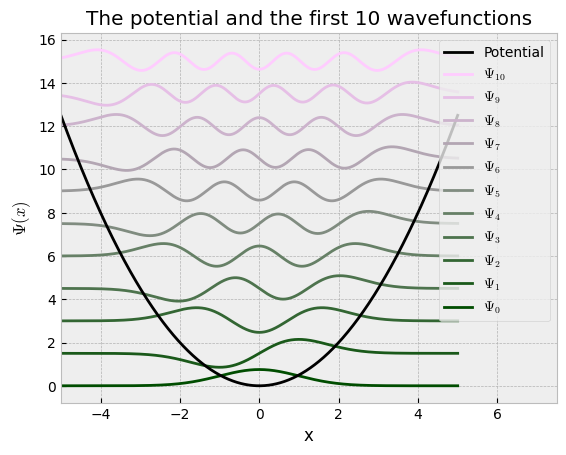

In [6]:
offset = 0
for index in range(11):
    color = (index/10,0.3+0.05*index,index/10)
    plt.plot(xValues,WFValuesArray[index]+offset,label=fr'$\Psi_{{{index}}}$',color=color)
    offset += 1.5
plt.plot(xValues,yValues,label='Potential',color='black')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1]) #Make the plotted wavefunctions match their place in the legend
plt.xlim(-5,7.5)
plt.xlabel(r'x')
plt.ylabel(r'$\Psi (x)$')
plt.title('The potential and the first 10 wavefunctions')
plt.show()

In [7]:
#Ex 2
def innerProduct(i,j,extraTerm):
    integrand = extraTerm*psi.subs({n:i})*psi.subs({n:j})
    if integrand.subs(x,-x) == -integrand: 
        return 0                                               #This condition says, if the total integrand
        #is an odd function, return 0 and dont bother integrate it, as it will be zero
    elif integrand.subs(x,-x) == integrand:
        2*sm.integrate(integrand,(x,0,sm.oo))
    return sm.integrate(integrand,(x,-sm.oo,sm.oo))
#This is already fast enough and there is no way to make it faster without changing the underlying
#library, so I will move on. 

In [18]:
#Ex 3.
#We should again do a Fourier transform, in k space. Going forward I will not do the calculation
#using impoper integrals in sympy as sympy has an issue with hermite functions and infinity, as per issue
# https://github.com/sympy/sympy/issues/18652
#Look at the mathematica notebook
k = sm.Symbol('k',real=True)
toleranceLimit = 10**3

In [9]:
phi = sm.Integral(psi*sm.exp(-sm.I*k*x),(x,-sm.oo,+sm.oo))*(1/sm.sqrt(2*pi))
phi.evalf()

0.398942280401433*Integral(exp(-x**2/2)*exp(-I*k*x)*hermite(n, x)/(2**(n/2)*pi**0.25*sqrt(factorial(n))), (x, -oo, oo))

In [10]:
#Ex 4.
part1 = sm.Integral(psi**2*x,(x,-sm.oo,+sm.oo))
part2 = sm.Integral(psi**2*x**2,(x,-sm.oo,+sm.oo))
DeltaX = sm.simplify(sm.sqrt(part2.evalf()-(part1.evalf())**2))
DeltaX

sqrt(2**n*pi**1.0*factorial(n)*Integral(x**2*exp(-x**2)*hermite(n, x)**2, (x, -oo, oo)) - pi**0.5*Integral(x*exp(-x**2)*hermite(n, x)**2, (x, -oo, oo))**2)/(2**n*pi**0.75*factorial(n))

In [11]:
part1k = sm.integrate(phi*k*phi,(k,-sm.oo,+sm.oo))
part2k = sm.integrate(phi*k**2*phi,(k,-sm.oo,+sm.oo))
DeltaK = sm.sqrt(part2k-part1k**2)
DeltaK

sqrt(-Integral(k*Integral(exp(-x**2/2)*exp(-I*k*x)*hermite(n, x)/(2**(n/2)*pi**0.25*sqrt(factorial(n))), (x, -oo, oo))**2, (k, -oo, oo))**2/(4*pi**2) + Integral(k**2*Integral(exp(-x**2/2)*exp(-I*k*x)*hermite(n, x)/(2**(n/2)*pi**0.25*sqrt(factorial(n))), (x, -oo, oo))**2, (k, -oo, oo))/(2*pi))

In [12]:
#As we can see, sympy refuses to calculate these relations, so we turn to mathematica

In [13]:
#Ex 5.  Look at the complimentary Mathematica notebook
with open(dataPath, "r") as json_file: #Always use open, so the file doesnt stay open if an error occurs
    data = json.load(json_file)

posValues = np.array(data["posValues"])
momentumValues = np.array(data["momentumValues"])
totalEntropyValues = posValues+momentumValues
nValues = np.arange(1,22,1)

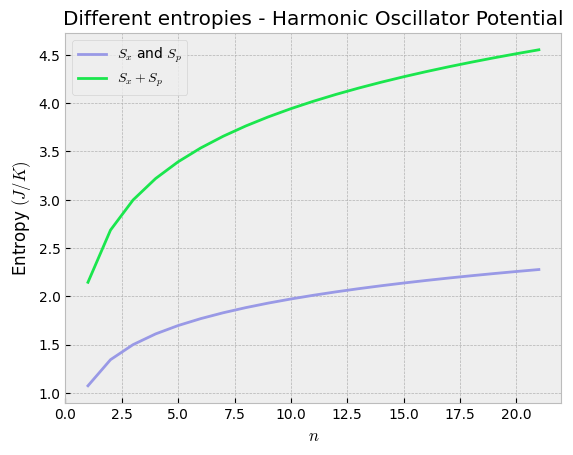

In [14]:
#A plot for the entropies of momentum and position
plt.plot(nValues,posValues,label=r'$S_x$ and $S_p$',color=(0.6,0.6,0.9))
#plt.plot(nValues,momentumValues,label=r'$S_p$',color=(0.6,0.6,0.2))
plt.plot(nValues,totalEntropyValues,label=r'$S_x+S_p$',color=(0.1,0.9,0.3))
plt.title('Different entropies - Harmonic Oscillator Potential')
plt.xlabel(r"$n$")
plt.ylabel(r"Entropy $(J/K)$")
plt.legend()
plt.show()

In [15]:
def fitFunc(x,a,b):
    return a+b*np.log(x)
xParams = curve_fit(fitFunc,nValues,posValues)[0]
totParams = curve_fit(fitFunc,nValues,totalEntropyValues)[0]

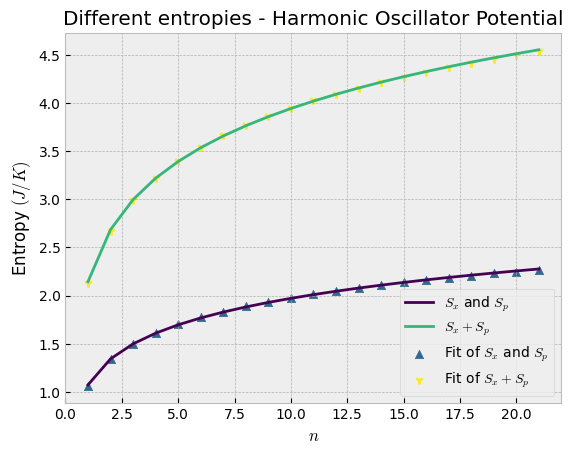

In [16]:
colorMap = plt.get_cmap('viridis', 4)
color = colorMap(0)
plt.plot(nValues,posValues,label=r'$S_x$ and $S_p$',color = color)
color = colorMap(2)
plt.plot(nValues,totalEntropyValues,label=r'$S_x+S_p$',color = color)
color = colorMap(1)
plt.scatter(nValues,fitFunc(nValues,*xParams),label=r'Fit of $S_x$ and $S_p$',color = color,marker="^")
color = colorMap(3)
plt.scatter(nValues,fitFunc(nValues,*totParams),label=r'Fit of $S_x+S_p$',color = color,marker="1")
plt.title('Different entropies - Harmonic Oscillator Potential')
plt.xlabel(r"$n$")
plt.ylabel(r"Entropy $(J/K)$")
plt.legend()
plt.show()
#Our choice of fit function nicely matches the data